# ELEN 6885 Reinforcement Learning Coding Assignment (Part 1, 2, 3)#
## Taxi Problem Overview
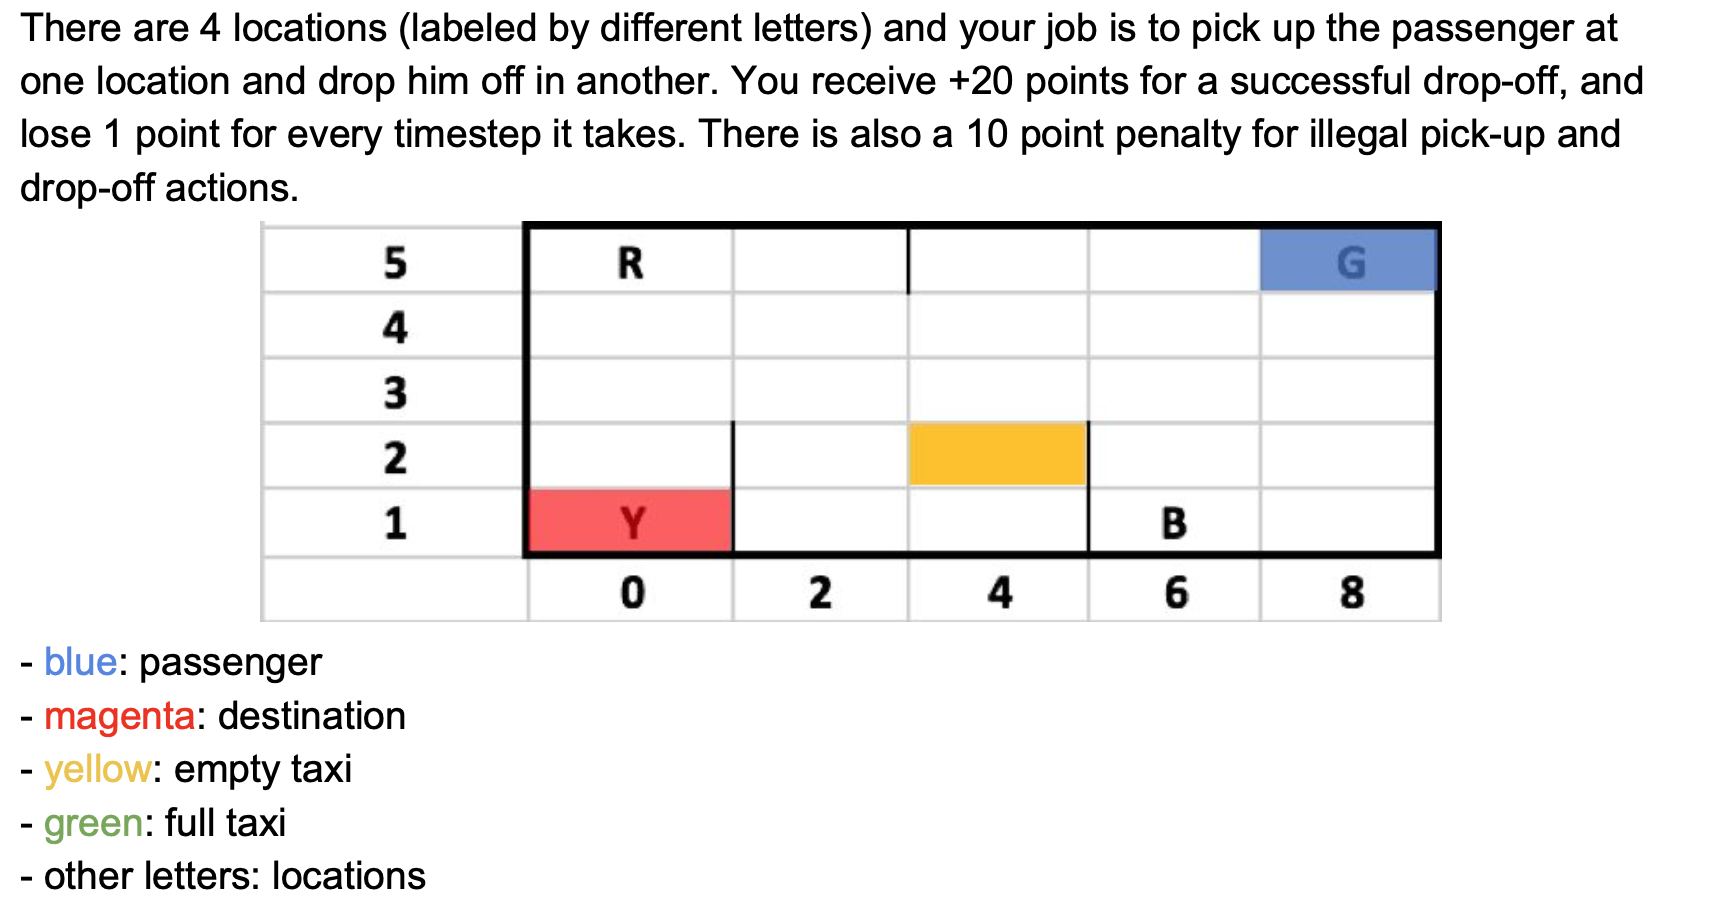
Please put your code into the block marked by:<br/>
############################<br/>
YOUR CODE STARTS HERE<br/>
YOUR CODE ENDS HERE<br/>
############################<br/>
You should not edit anything outside of the block.

# Playing with the environment

Run the cell below to get a feel for the environment by moving your agent(the taxi) by taking one of the actions at each step.

In [ ]:
# !pip install gym

In [1]:
from gym.wrappers import Monitor   
import gym
import random
import numpy as np

In [ ]:
"""
You can test your game now.
Input range from 0 to 5:
    0 : South (Down)      # if you hit the wall, stand still
    1 : North (Up)
    2 : East (Right)
    3 : West (Left)
    4: Pick up
    5: Drop off
    6: exit_game
"""
GAME = "Taxi-v3"
env = gym.make(GAME)
env = Monitor(env, "taxi_simple", force=True)
s = env.reset()
steps = 100
for step in range(steps):
    env.render()
    action = int(input("Please type in the next action:"))
    if action==6:
        break
    s, r, done, info = env.step(action)
    print('state:',s)
    print('reward:',r)
    print('Is state terminal?:',done)
    print('info:',info)

# close environment and monitor
env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## 1.1 Incremental implementation of average

We've finished the incremental implementation of average for you. Please call the function to estimate with 1/step step size and fixed step size to compare the difference between these two on a simulated Bandit problem.

In [2]:
def estimate(OldEstimate, StepSize, Target):
    '''An incremental implementation of average.
    OldEstimate : float
    StepSize : float
    Target : float
    '''
    NewEstimate = OldEstimate + StepSize * (Target - OldEstimate)
    return NewEstimate

In [3]:
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size, index from 0 to 10000, total length = 10001
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5             # A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    ############################
    
    q_h[step] = estimate(q_h[step-1],1.0/step,r)
    q_f[step] = estimate(q_f[step-1],FixedStepSize,r)
    
    ############################
    
q_h = q_h[1:] # copy q_h from index 1 to 10000 as curent from index 0 to 9999
q_f = q_f[1:]

Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

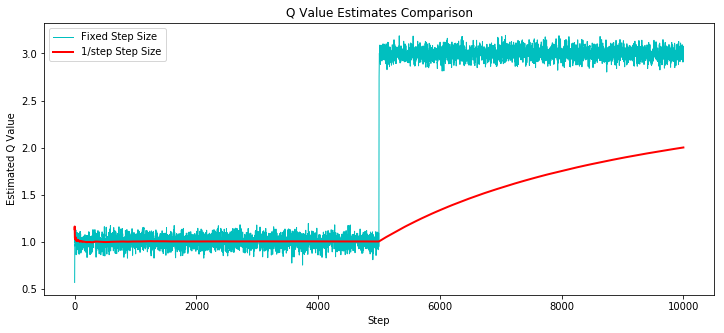

In [5]:
############################

plt.figure(figsize=(12, 5))
plt.plot(q_f,'c',label='Fixed Step Size', linewidth=1)
plt.plot(q_h,'r',label='1/step Step Size', linewidth=2)
plt.title('Q Value Estimates Comparison')
plt.ylabel('Estimated Q Value')
plt.xlabel('Step')
plt.legend()
plt.show()

############################

## 1.2 $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are supposed to implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy the following block.

In [6]:
def max_random(value):
    max_index = []
    max_value = value[0]
    for i in range(0,len(value)):
        if (value[i] > max_value):
            max_index = []
            max_index.append(i)
            max_value = value[i]
        elif (value[i] == max_value):
            max_index.append(i)
    return random.choice(max_index)

In [7]:
def epsilon_greedy(value, e, seed = None):
    '''
    Implement Epsilon-Greedy policy.

    Inputs:
    value: numpy ndarray
    A vector of values of actions to choose from
    e: float
    Epsilon
    seed: None or int
    Assign an integer value to remove the randomness

    Outputs:
    action: int
    Index of the chosen action
    '''
    assert len(value.shape) == 1
    assert 0 <= e <= 1
    
    if seed != None:
          np.random.seed(seed)

    ############################
    
    if random.random() > e:
        action = max_random(value)
    else:
        action = random.randrange(len(value))
    
    ############################    
    return action

In [8]:
np.random.seed(6885) #Set the seed forreproducability
q = np.random.normal(0, 1, size = 5)
############################

greedy_action = epsilon_greedy(q, 0, 6885)
e_greedy_action = epsilon_greedy(q, 0.1, 6885)

############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 2


## 1.3 Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in Chapter 2.3.

This was a set of 2000 randomly generated n-armed bandit tasks with n = 10. For each bandit, the action values, q(a), a = 1,...,10, were selected according to a normal (Gaussian) distribution with mean 0 and variance 1. On tth time step with a given bandit, the actual reward Rt was the q(At) for the bandit (where At was the action selected) plus a normally distributed noise term that was mean 0 and variance 1. Averaging over bandits, we can plot the performance and behavior of various methods as they improve with experience over 1000 steps.

I copied that figure here:
<center>
    <img src='figures/figure22.PNG' width=500></img>
</center>

In [9]:
def one_reward(numTimeStep, numArm, e):
   
    Q_a =  np.random.normal(0, 1, size = numArm) # actual action value
    n = np.random.normal(0, 1, numTimeStep + 1)      # noise
    r = np.zeros(numTimeStep + 1)                # actual reward (plus noise)
    q_a = np.zeros((numTimeStep + 1, numArm))    # action value
    c = np.zeros(numArm)                         # count num visit
     
    for step in range(1, numTimeStep + 1): 
        greedy_action = epsilon_greedy(q_a[step-1,:], e,)
        for i in range(0, numArm):
            if (i == greedy_action):
                r[step] = Q_a[i] + n[step]
                c[i] += 1
                q_a[step,i] = estimate(q_a[step-1,i],1.0/c[i],r[step])
            else:
                q_a[step,i] = q_a[step-1, i]
    return r

In [10]:
# Average reward is actually 1/step Step Size value function
def average_reward(numTimeTask, numTimeStep, numArm, e):
    average_R = np.zeros(numTimeStep+1)
    for task in range(1, numTimeTask + 1):   
        r = one_reward(numTimeStep, numArm, e,)
        average_R = estimate(average_R,1.0/task,r)
    return average_R

In [11]:
# Do the experiment and record average reward acquired in each time step
# np.random.seed(6885)
numTimeStep = 1000
numTimeTask = 2000
numArm = 10

In [12]:
myR_0 = average_reward(numTimeTask, numTimeStep, numArm, 0)             # average reward with greedy policy
myR_01 = average_reward(numTimeTask, numTimeStep, numArm, 0.1)          # average reward with epsilon greedy
myR_001 = average_reward(numTimeTask, numTimeStep, numArm, 0.01)

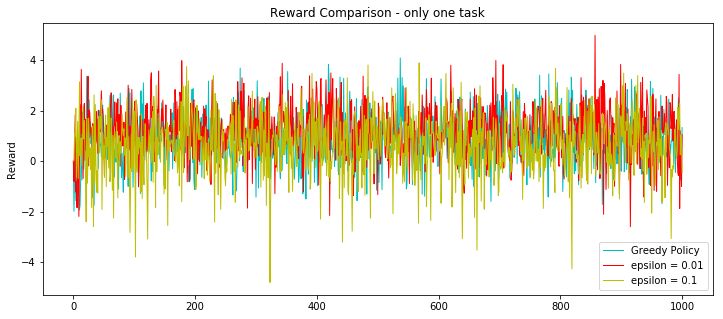

In [13]:
# every time show a random task
t1 = one_reward(numTimeStep, numArm, 0)
t2 = one_reward(numTimeStep, numArm, 0.01)
t3 = one_reward(numTimeStep, numArm, 0.1)

plt.figure(figsize=(12, 5))
plt.plot(t1,'c',label='Greedy Policy', linewidth=1)
plt.plot(t2,'r',label='epsilon = 0.01', linewidth=1)
plt.plot(t3,'y',label='epsilon = 0.1', linewidth=1)
plt.title('Reward Comparison - only one task')
plt.ylabel('Reward')
plt.legend()
plt.show()

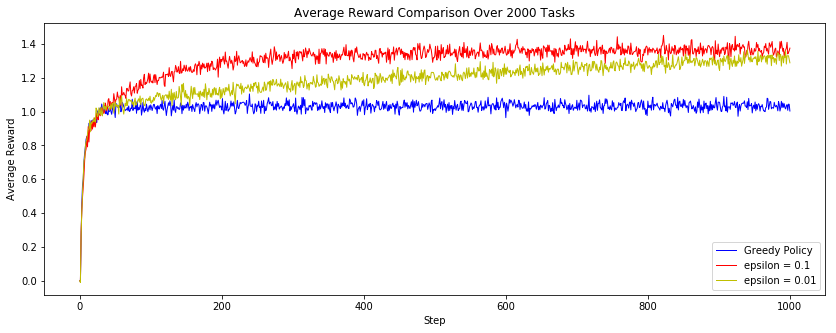

In [14]:
# Plot the average reward
############################

plt.figure(figsize=(14, 5))
plt.plot(myR_0,'b',label='Greedy Policy', linewidth=1)
plt.plot(myR_01,'r',label='epsilon = 0.1', linewidth=1)
plt.plot(myR_001,'y',label='epsilon = 0.01',linewidth=1)
plt.title('Average Reward Comparison Over 2000 Tasks')
plt.ylabel('Average Reward')
plt.xlabel('Step')
plt.legend()
plt.show()

############################

# Question 2
In this question, you will implement the value iteration and policy iteration algorithms to solve the Taxi game problem

## 2.1 Model-based RL: value iteration

For this part, you need to implement the helper functions action_evaluation(env, gamma, v), and extract_policy(env, v, gamma) in utils.py. Understand action_selection(q) which we have implemented. <br/>
Use these helper functions to implement the value_iteration algorithm below. 

In [9]:
import numpy as np
from helpers import utils
def value_iteration(env, gamma, max_iteration, theta):
    """
    Implement value iteration algorithm. You should use extract_policy to for extracting the policy.

    Parameters
    ----------
    env: OpenAI env. 
            env.P: dictionary
                    the transition probabilities of the environment
                    P[state][action] is tuples with (probability, nextstate, reward, terminal)
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    gamma: float
            Discount factor. 
    max_iteration: int
            The maximum number of iterations to run before stopping. 
    theta: float
            Determines when value function has converged.
    Returns:
    ----------
    value function: np.ndarray
    policy: np.ndarray
    """
    V = np.zeros(env.nS)
    ############################
    
    # value iteration within max_iteration and theta checkpoint
    for i in range(max_iteration):
        delta = 0
        for s in range(env.nS):
            temp = V[s]
            max_q = 0
            for a in range(env.nA): 
                q_s_a = 0
                for i in range(len(env.P[s][a])):
                    next_state_tuple =env.P[s][a][i]
                    v_next_state = V[next_state_tuple[1]]
                    p_next_state = next_state_tuple[0]
                    reward_next_state = next_state_tuple[2]
                    q_s_a +=  p_next_state*(reward_next_state + gamma*v_next_state)
                if(q_s_a > max_q):
                    max_q = q_s_a
                    # print(q_s_a)
            
            V[s] = max_q
            delta = max(delta, abs(temp-V[s]))
        # check condition
        if (delta < theta):
            break
             
    # output a deterministic policy        
    policy = utils.extract_policy(env, V, gamma)
    
    ############################
    
    return V, policy


After implementing the above function, read and understand the functions implemented in evaluation_utils.py, which we will use to evaluate our value iteration policy

In [10]:
from helpers import evaluation_utils
import gym
GAME = "Taxi-v3"
env = gym.make(GAME)
V_vi, policy_vi = value_iteration(env, gamma=0.95, max_iteration=6000, theta=1e-5)
# visualize how the agent performs with the policy generated from value iteration
evaluation_utils.render_episode(env, policy_vi)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | :_|
|Y| : |B: |

In [11]:
# evaluate the performance of value iteration over 100 episodes
evaluation_utils.avg_performance(env, policy_vi)

8.01010101010101

## 2.2 Model-based RL: policy iteration
In this part, you are supposed to implement policy iteration to solve the Taxi game problem.

In [12]:
from helpers import utils
def policy_iteration(env, gamma, max_iteration, theta):
    """Implement Policy iteration algorithm.

    You should use the policy_evaluation and policy_improvement methods to
    implement this method.

    Parameters
    ----------
    env: OpenAI env.
            env.P: dictionary
                    the transition probabilities of the environment
                    P[state][action] is tuples with (probability, nextstate, reward, terminal)
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    gamma: float
            Discount factor. 
    max_iteration: int
            The maximum number of iterations to run before stopping. 
    theta: float
            Determines when value function has converged.
    Returns:
    ----------
    value function: np.ndarray
    policy: np.ndarray
    """

    V = np.zeros(env.nS)
    policy = np.zeros(env.nS, dtype=int)
    policy_stable = False
    ############################
    
    # it should be while(True)
    for j in range(max_iteration):
        
        V = policy_evaluation(env, policy, gamma, max_iteration, theta)
        policy, policy_stable = policy_improvement(env, V, policy, gamma)
        if (policy_stable):
            break
        
    ############################
 
    return V, policy


def policy_evaluation(env, policy, gamma, max_iteration, theta):
    """Evaluate the value function from a given policy.

    Parameters
    ----------
    env: OpenAI env. 
            env.P: dictionary
                    the transition probabilities of the environment
                    P[state][action] is tuples with (probability, nextstate, reward, terminal)
            env.nS: int
                    number of states
            env.nA: int
                    number of actions

    gamma: float
            Discount factor. 
    policy: np.array
            The policy to evaluate. Maps states to actions.
    max_iteration: int
            The maximum number of iterations to run before stopping. 
    theta: float
            Determines when value function has converged.
    Returns
    -------
    value function: np.ndarray
            The value function from the given policy.
    """
    V = np.zeros(env.nS)
    ############################

    for i in range(max_iteration):
        delta = 0
        a = 0    # action following the current policy
        for s in range(env.nS):
            temp = V[s]
            v = 0
            a = policy[s]
            for i in range(len(env.P[s][a])):
                next_state_tuple = env.P[s][a][i]
                v_next_state = V[next_state_tuple[1]]
                p_next_state = next_state_tuple[0]
                reward_next_state = next_state_tuple[2]
                v +=  p_next_state*(reward_next_state + gamma*v_next_state)
       
            V[s] = v
            delta = max(delta, abs(temp-V[s]))
        # check condition
        if (delta < theta):
            break
    ############################

    return V


def policy_improvement(env, value_from_policy, policy, gamma):
    """Given the value function from policy, improve the policy.

    Parameters
    ----------
    env: OpenAI env
            env.P: dictionary
                    the transition probabilities of the environment
                    P[state][action] is tuples with (probability, nextstate, reward, terminal)
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    
    value_from_policy: np.ndarray
            The value calculated from the policy
    policy: np.array
            The previous policy.
    gamma: float
            Discount factor. 

    Returns
    -------
    new policy: np.ndarray
            An array of integers. Each integer is the optimal action to take
            in that state according to the environment dynamics and the
            given value function.
    stable policy: bool
            True if the optimal policy is found, otherwise false 
    """
    ############################
    
    new_policy = np.zeros(env.nS, dtype=int)
    policy_stable = True
    
    new_policy = utils.extract_policy(env, value_from_policy, gamma)
    for s in range(env.nS):      
        if (new_policy[s] != policy[s]):
            policy_stable = False
        
    ############################

    return new_policy, policy_stable


In [13]:
## Testing out policy iteration policy for one episode
GAME = "Taxi-v3"
env = gym.make("Taxi-v3")
V_pi, policy_pi = policy_iteration(env, gamma=0.95, max_iteration=6000, theta=1e-5)

In [14]:
# visualize how the agent performs with the policy generated from policy iteration
evaluation_utils.render_episode(env, policy_pi)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: 

In [15]:
# evaluate the performance of policy iteration over 100 episodes
print(evaluation_utils.avg_performance(env, policy_pi))

7.828282828282828


# Part 3: Q-learning and SARSA

## 3.1 Model-free RL: Q-learning
In this part, you will implement Q-learning.

In [136]:
def QLearning(env, num_episodes, gamma, lr, e):
    """
    Implement the Q-learning algorithm following the epsilon-greedy exploration.
    Inputs:
    env: OpenAI Gym environment 
            env.P: dictionary
                    P[state][action] are tuples of tuples tuples with (probability, nextstate, reward, terminal)
                    probability: float
                    nextstate: int
                    reward: float
                    terminal: boolean
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    num_episodes: int
            Number of episodes of training
    gamma: float
            Discount factor.
    lr: float
            Learning rate.
    e: float
            Epsilon value used in the epsilon-greedy method.
    Outputs:
    Q: numpy.ndarray
    """
    Q = np.zeros((env.nS, env.nA))
    
    ############################
    
    for s in range(env.nS):
        terminal = env.P[s][5][0][3]
        if terminal:
            Q[s][5] = 0
    # run each episode        
    for i in range(num_episodes):
        s = env.reset()
        while True:
            A = epsilon_greedy(Q[s], e, None)
            R = -100
            s_next = 0
            t = False
            
            # observe
            next_state_tuple = env.P[s][A][0]
            s_next = next_state_tuple[1]
            t = next_state_tuple[3]
            R = next_state_tuple[2]
            Q[s][A] += lr*(R + gamma*max(Q[s_next]) - Q[s][A])
            s = s_next
            
            # check terminial state
            if t:
                break
    
    ############################

    return Q

In [139]:
env = gym.make("Taxi-v3")
Q_q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
# print('Action values:')
# print(Q_q)

In [140]:
policy_estimate_q= utils.action_selection(Q_q)
evaluation_utils.render_episode(env, policy_estimate_q)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |

## 3.2 Model-free RL: SARSA
In this part, you will implement Sarsa.

In [97]:
def SARSA(env, num_episodes, gamma, lr, e):
    """
    Implement the SARSA algorithm following epsilon-greedy exploration.
    Inputs:
    env: OpenAI Gym environment 
            env.P: dictionary
                    P[state][action] are tuples of tuples tuples with (probability, nextstate, reward, terminal)
                    probability: float
                    nextstate: int
                    reward: float
                    terminal: boolean
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    num_episodes: int
            Number of episodes of training
    gamma: float
            Discount factor.
    lr: float
            Learning rate.
    e: float
            Epsilon value used in the epsilon-greedy method.
    Outputs:
    Q: numpy.ndarray
            State-action values
    """
    Q = np.zeros((env.nS, env.nA))
    ############################
    
    for s in range(env.nS):
        terminal = env.P[s][5][0][3]
        if terminal:
            Q[s][5] = 0
    
    # run each episode        
    for i in range(num_episodes):
        s = env.reset()
        A = epsilon_greedy(Q[s], e, None)
        while True:
            R = -100
            s_next = 0
            t = False
    
            # observe
            next_state_tuple = env.P[s][A][0]
            s_next = next_state_tuple[1]
            t = next_state_tuple[3]
            R = next_state_tuple[2]
            a = epsilon_greedy(Q[s_next], e, None)
            Q[s][A] += lr*(R + gamma*Q[s_next][a] - Q[s][A])
            
            s = s_next
            A = a
            # check terminial state
            if t:
                break
    
    ############################

    return Q

In [98]:
env = gym.make("Taxi-v3")
Q_s = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
# print('Action values:')
# print(Q_s)

In [99]:
policy_estimate_s = utils.action_selection(Q_s)
evaluation_utils.render_episode(env, policy_estimate_s)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |


## Learning Process of Q-learning and Sarsa

Plot the learning process of both algorithms for training 1000 episodes. (x-axis:
episodes numbers, y-axis: average rewards)

In [269]:
def rQ(average):
    r_Q = np.zeros(1000)
    for p in range(average):
        Q = np.zeros((env.nS,env.nA))
        for i in range(1000):
            s = env.reset()
            temp = Q
            while True:
                a = epsilon_greedy(Q[s],0.1,None)
                s_next, r, done, _ = env.step(a)
                r_Q[i] += r
                Q[s][a] += 0.1*(r+max(temp[s_next])-Q[s][a])
                s = s_next
                if done:
                    break
    return r_Q/average

In [261]:
def rS(average):
    r_S = np.zeros(1000)
    for o in range(average):
        Q = np.zeros((env.nS,env.nA))
        for i in range(1000):
            s = env.reset()
            a = epsilon_greedy(Q[s],0.1,None)
            while True:
                s_next, r, done, _ = env.step(a)
                r_S[i] += r
                a0 = epsilon_greedy(Q[s_next],0.1,None)
                Q[s][a] += 0.1*(r+Q[s_next][a0]-Q[s][a])
                s = s_next
                a = a0
                if done:
                    break
    return r_S/average

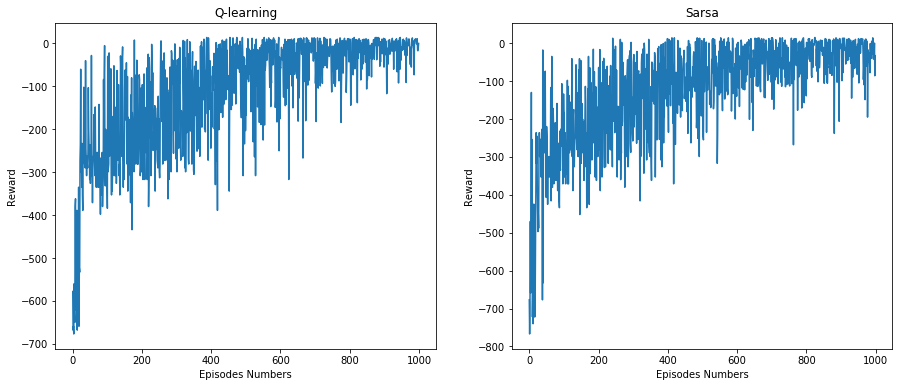

In [296]:
rews = rS(1)    # is average reward means that we have many trails -> change params here
rewq = rQ(1)

# plot only reward for one trial
fig = plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.plot(rewq)
plt.xlabel('Episodes Numbers')
plt.ylabel('Reward')
plt.title('Q-learning')

plt.subplot(1, 2, 2)
plt.plot(rews)
plt.xlabel('Episodes Numbers')
plt.ylabel('Reward')
plt.title('Sarsa')

plt.show()

In [303]:
def QLearning_performance(env, num_episodes, gamma, lr, e):
    from helpers import evaluation_utils
    from helpers import utils
    def Observe(S,A):
        trans_list = env.P[S][A]
        cdf = []
        cum_prob = 0  
        for i in range(len(trans_list)):
            prob = trans_list[i][0]
            cum_prob += prob
            cdf.append(cum_prob)
        token = random.uniform(0,1)
        i = 0
        while (token > cdf[i]):
            i += 1
        R, S_next, terminal = trans_list[i][2], trans_list[i][1], trans_list[i][3] 
        return R, S_next, terminal

    def initialize():
        Q = np.random.rand(env.nS, env.nA) 
        for s in range(env.nS):
            terminal = env.P[s][5][0][3]
            if terminal:
                Q[s][5] = 0
        return Q
    
    Q = initialize()
    R_cum = np.zeros(num_episodes)
    for epi in range(num_episodes): 
        S = env.reset()
        while True:
            A = epsilon_greedy(Q[S], e)
            R, S_next, terminal = Observe(S,A)
            R_cum[epi] += R
            Q[S][A] += lr * (R + gamma*max(Q[S_next])-Q[S][A])
            S = S_next
            if terminal:
                break

    return R_cum  

In [304]:
def SARSA_performance(env, num_episodes, gamma, lr, e):
    def Observe(S,A):
        trans_list = env.P[S][A]
        cdf = []
        cum_prob = 0  
        for i in range(len(trans_list)):
            prob = trans_list[i][0]
            cum_prob += prob
            cdf.append(cum_prob)
        token = random.uniform(0,1)
        i = 0
        while (token > cdf[i]):
            i += 1
        R, S_next, terminal = trans_list[i][2], trans_list[i][1], trans_list[i][3] 
        return R, S_next, terminal

    def initialize():
        Q = np.random.rand(env.nS, env.nA) 
        for s in range(env.nS):
            terminal = env.P[s][5][0][3]
            if terminal:
                Q[s][5] = 0
        return Q

    Q = initialize()
    R_cum = np.zeros(num_episodes)
    for epi in range(num_episodes):
        S = env.reset() 
        A = epsilon_greedy(Q[S], e)
        while True:
            R, S_next, terminal = Observe(S,A)
            R_cum[epi] += R
            A_next = epsilon_greedy(Q[S_next], e)
            Q[S][A] += lr * (R + gamma*Q[S_next][A_next]-Q[S][A])        
            S, A = S_next, A_next
            if terminal:
                break

    return R_cum 

In [305]:
R_Ql = QLearning_performance(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
R_Sa = SARSA_performance(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)

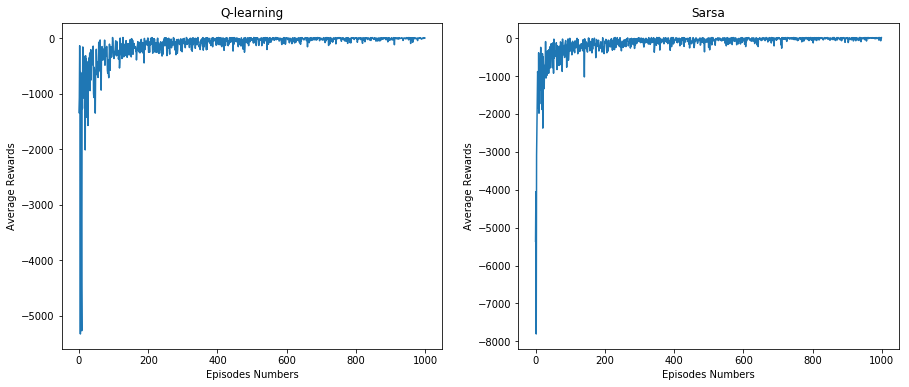

In [306]:
# plot average rewards over 100 trails
fig = plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.plot(R_Ql)
plt.xlabel('Episodes Numbers')
plt.ylabel('Average Rewards')
plt.title('Q-learning')

plt.subplot(1, 2, 2)
plt.plot(R_Sa)
plt.xlabel('Episodes Numbers')
plt.ylabel('Average Rewards')
plt.title('Sarsa')

plt.show()